## 1. Data Loading and Initial Overview

This section loads the credit risk dataset and performs basic sanity checks
to understand the structure, data types, and target variable.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("../data/raw/german_credit.csv")

# Basic info
df.head(), df.shape, df.info()
df = df.drop(columns=["Unnamed: 0"])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


## 2. Target Variable Definition

Since the dataset does not explicitly provide a default label,
a proxy target variable is created based on credit amount and loan duration.
Higher credit amount combined with longer duration is treated as higher risk.


In [5]:
# Create a proxy default variable
df['default'] = np.where(
    (df['Credit amount'] > df['Credit amount'].median()) &
    (df['Duration'] > df['Duration'].median()),
    1,
    0
)

df[['Credit amount', 'Duration', 'default']].head()


,Credit amount,Duration,default
0,1169,6,0
1,5951,48,1
2,2096,12,0
3,7882,42,1
4,4870,24,1


## 3. Default Rate Analysis

This section examines the distribution of default vs non-default cases
to understand class imbalance in the dataset.


In [6]:
# Default distribution
df['default'].value_counts()


default
0    650
1    350
Name: count, dtype: int64

In [7]:
# Default percentage
df['default'].value_counts(normalize=True) * 100


default
0    65.0
1    35.0
Name: proportion, dtype: float64

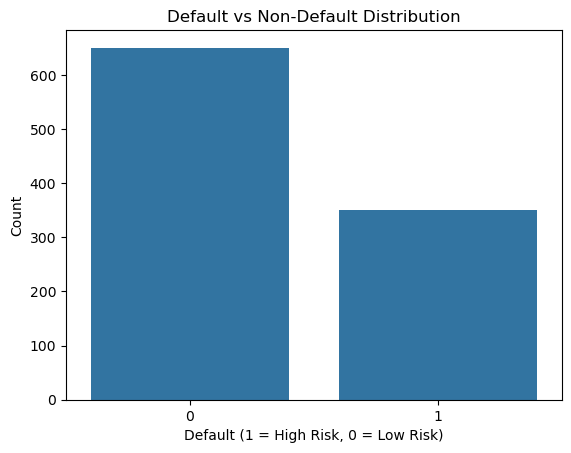

In [8]:
sns.countplot(x='default', data=df)
plt.title("Default vs Non-Default Distribution")
plt.xlabel("Default (1 = High Risk, 0 = Low Risk)")
plt.ylabel("Count")
plt.show()


**Observation:**

The target variable shows a noticeable class imbalance, with non-default
cases forming the majority. This mirrors real-world credit datasets and
will be addressed during model development using techniques such as
class weighting or resampling.
